<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CST2312/blob/main/CST2312_Class07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CST2312 - Class #07, follow-up on reading files in Google Colab
by Professor Patrick, 27-Sep-2021    


updated on 23-Feb-2022    

This notebook on Colab at `https://bit.ly/CST2312-CL07`    

The mbox-short.txt file used in this notebook on Google Drive at `https://bit.ly/mbox-short-txt`    



This notebook works with a Github repository in ProfessorPatrickSlatraigh/CST2312. 

That repository includes the files "mbox-short.txt" and "mbox.txt". 
The repo can be cloned to be used in Google Colab as a resource or a URL for a file in the Github repo, or Google Drive can be used to open a Python handle for a file which will persist beyond the current Colab session.  Before working with the file in Github or Google Drive, the first section of this notebook describes how local files can be uploaded to a Colab session. Files which are uploaded as resources to the content area of Colab do not persist after the Colab notebook is closed.



Here is the mbox-short.txt file as a reference: https://www.py4e.com/code3/mbox-short.txt , which is a shortened version of the file: https://www.py4e.com/code3/mbox.txt .  Both files are text files which contain a series of email messages.  The files are used as references in exercises in the Charles Severance book Python for Everybody (py4e.com).



---



## QuickGuide to Colab Session Files

Take a moment to familiaize yourself with the different approaches to accessing files using Google Colab.

*Note that file access from other platforms (Jupyter notebook on machine/virtual machine, Cloud, etc.) will have different approaches to accessing files.  Regardless, Python will use a `file handle` variable to work with a file once it has been attached and opened.*



---



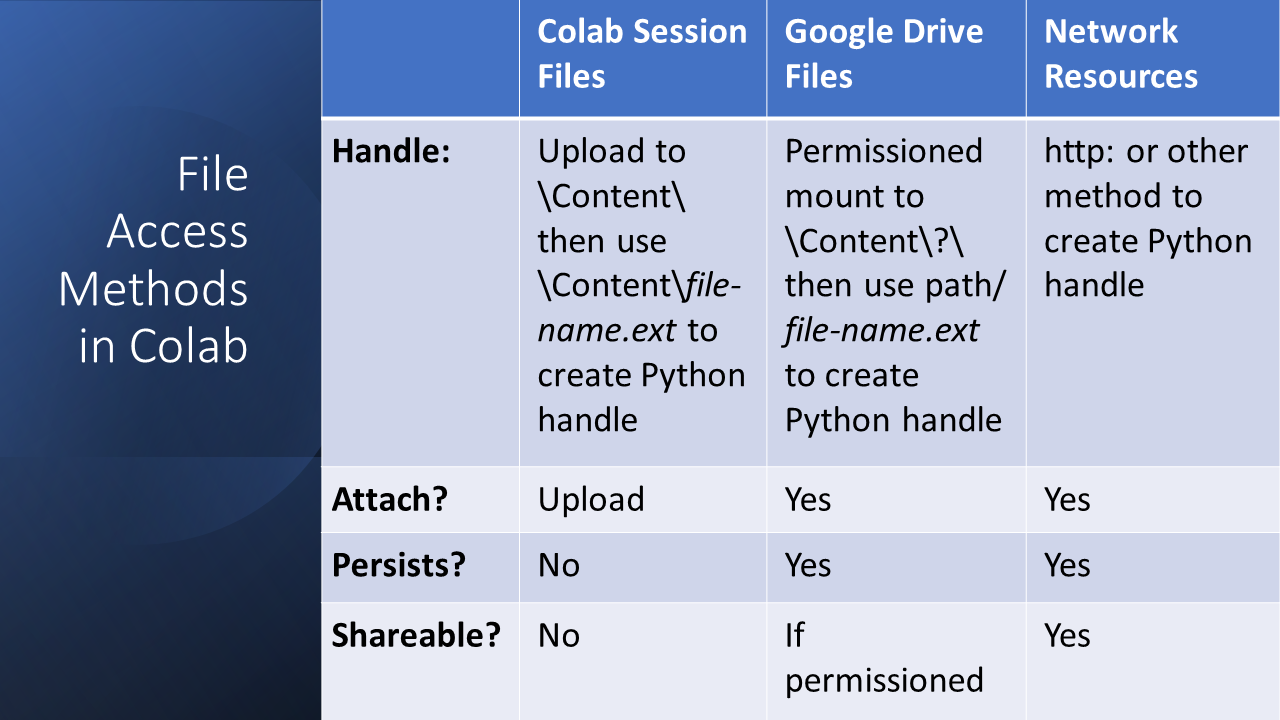

## Preparing the Environment    


**Import required libraries/modules**

The following code snippet imports pandas which is needed for the file loading processes from Github and Googe Drive (gdrive) which are described at the bottom of this notebook.

In [7]:
# let's import pandas as pd so that we have it available
import pandas as pd


The following code snippet imports the `Requests` library as `rq` -- we will need that to read PasteBin and other HTTPS data sources. 

In [38]:
import requests as rq



---



## **UPLOADING TO COLAB EVERY TIME**

The first example reads "mbox-short.txt" from the Google Colab content folder "sample_data".  In order to do that, the "mbox-short.txt" file needs to be uploaded to the "sample_data" folder.  That upload is temporary for the Google Colab session - the "mbox-short.txt" file will go away after you finish with your active Colab notebook.  Note that this method does not require pandas.


Use the panel on the left of your Colab session to navigate to the content area and the "sample_data" folder.  Then use the three vertical dots to the right of the name "sample_data" to choose 'Upload' and navigate to the "mbox-short.txt" file on your computer.


Use the three vertical dots to your uploaded "mbox_short.txt" file in the "sample_data" content folder to choose "Copy path" and that will put the full path (URL) in your clipboard.  If the path is not the same as in the following call to the open() command then replace the string for the file name with the URL from your clipboard - paste it in as the argument to open().

In [ ]:
colab_handle = open("/content/sample_data/mbox-short.txt")

Alternatively, the following code will open the file if it was uploade to the `\content` folder.

In [1]:
colab_handle = open("/content/mbox-short.txt")

Now you can use the print function to see the attributes of the new colab_handle you created to the "mbox-short.txt" file in the content folder "sample_data" on Google Colab.


In [ ]:
print(colab_handle)

You can use a for loop to print the contents of "mbox_short.txt"

In [ ]:
for line in colab_handle :
    print(line)

Why does that produce a double-spaced output with a blank line after every line?    

Because the lines of the file have newline `\n` at the end and the `print()` function wants to print a newline `\n` each time.

This can be fixed one of two ways:    

1. tell the `print()` function to not print a newline `\n`
2. print the variable 'line' without its last character (the newline `\n`)


### Working with File Lines

Extra new lines in printouts can be fixed one of two ways:    

1. tell the `print()` function to not print a newline `\n`
2. print the variable 'line' without its last character (the newline `\n`) 

But, remember that we have already read the file referenced with `colab_handle` to the end of the file and now the file pointer is at the end of the file.    

We need to reset the file pointer to the start of the file on the handle `colab_handle`.   We do that with the `seek()` method.   We give the `seek()` method the argument `0` as in:    

`colab_handle.seek(0)`

In [ ]:
# reset the file to the beginning
colab_handle.seek(0)

In [ ]:
# solution #1 - make the end character of print() empty
for line in colab_handle :
    print(line, end='')

In [ ]:
# reset the file to the beginning
colab_handle.seek(0) 

# solution #2 - print the variable line without its last character
for line in colab_handle :
    print(line[0:-1])

**Using .rstrip()**

Another way to remove the `/n` newline characters from each line read is to use the `.rstrip()` method which removes white-noise (spaces, newlines, etc.) from the right side of a string. 

In [ ]:
# reset the file to the beginning
colab_handle.seek(0)

# solution #3 - use .strip() to remove the newline etc.
for line in colab_handle:
    line = line.rstrip()           # remove newlines etc from right end
    if line.startswith('From:') :  # test for From: lines
        print(line)


**For Loop Variable Names**

Reminder:    
We can use any variable name we want as the variable in the `for` statement.

In [ ]:
# reset the file to the beginning
colab_handle.seek(0)
for text in colab_handle :
    print(text)


**Valid Values for the File Pointer**

An interesting observation about the file pointer -- we can set the file pointer to any valid position in the file.

In [ ]:
# set the file to the 1,000th character
colab_handle.seek(1000)
for line in colab_handle :
    print(line[0:-1])

**Using Continue in For Loops**

We can reset the file handles and use the `continue` statement in a `for` loop to only print the lines which begin with the string "From:".  When a `for` loop reads lines from a file, the `continue` statement goes to the next line of the file and begins at the start of the code block in the `for` loop.   

In [ ]:
# reset the file to the beginning
colab_handle.seek(0)

for line in colab_handle:
    line = line.rstrip()               # strip off newlines, etc. from right end
    if not line.startswith('From:') :  # test for From: records
        continue
    print(line)


**Using in to Select Lines**    

We can look for a string anywhere in a line as our selection criteria.    



In [ ]:
# reset the file to the beginning
colab_handle.seek(0)

for line in colab_handle:
    line = line.rstrip()            # strip off newlines, etc. from right end
    if not '@uct.ac.za' in line :   # ignoring selected lines with 'in'
        continue
    print(line)


**User Input of File Name**    

There are often cases where the actual file name to process may be a variable. The next snippet of code will allow you to enter any valid file name available and it will then use a `for` loop to count the records in that file which have the string 'Subject' in them.    

You can test this out with `mbox-short.txt`, `mbox.txt`, or any valid file name accessible in your session.    

*Note that file names will be search in the `\content` directory.* 

*BE SURE TO HAVE THE `MBOX.TXT` FILE UPLOADED FOR THE NEXT SNIPPET OF CODE.*

In [ ]:
# ask the user for a valid file name
fname = input('Enter the file name:  ')

fhand = open(fname)  # open the file name in the string fname

count = 0
for line in fhand:
    if line.startswith('Subject:') :  # select records to count
        count = count + 1
        
# print the value of the count variable at the end of processing
print('There were', count, 'subject lines in', fname)


**What happens if the user enters an invalid file name?**    

**Try it.**    

*There is an elegant way to manage that problem.*

**Using Try and Except**     

To manage for the sitation where the user may enter an invalid file name, put the entire process of opening the file and processing it inside a `try` and `except` block.  The header `try` tells Python to try the block of code under the `try` and, in the event there is an exception or processing error to go to the `except` block of code instead of displaying an error message.

In [ ]:
# ask the user for a valid file name
fname = input('Enter the file name:  ')

try: 
    fhand = open(fname)
    count = 0
    for line in fhand:
        if line.startswith('Subject:') :  # select records to count
            count = count + 1
    # print the value of the count variable at the end of processing
    print('There were', count, 'subject lines in', fname)
except:
    print('The file '+fname+' could not be opened.  Nothing processed.')


**Using Try, Except, and Else**    

Another use of the `try` block is to use two alternatives for processing blocks after the block under the `try` header:    

* an `except` block to process if there are exceptions    
* an `else` block to process otherwise    

Depending on the flow of execution intended, the use of `try`, `except`, and `else` may be more intuitive to read.    

In the following snippet of code the message printed by the `except` block really only applies to exceptions in trying to open a file.  That message printing for any other type of exception might be a cause of confusion. 

In [ ]:
# ask the user for a valid file name
fname = input('Enter the file name:  ')

try: 
    fhand = open(fname)
except:
    print('The file '+fname+' could not be opened.  Nothing processed.')
else: 
    count = 0
    for line in fhand:
        if line.startswith('Subject:') :  # select records to count
            count = count + 1
    # print the value of the count variable at the end of processing
    print('There were', count, 'subject lines in', fname)


All of the aforemetioned means of processing lines read in a file apply to files opened not only directly in Colab but using other methods as well. 



---



# **READING FILES FROM GITHUB**

Now let's try reading the same file from a Github repository (repo).  We will use the CST2312 repo in the ProfessorPatrickSlatraigh account on Github.  The file "mbox-short.txt" was uploaded to that repo.  

From Github we navigated to the "mbox-short.txt" file and viewed it in it's raw format using the "raw" button to the right of the file name.  While in raw viewing mode in a browser, we copied the URL from the browser to the clipboard.  Please note that this works with open repos, not private repos.


*Note: the pandas library will need to be imported as `pd` for the following snippet to work* 

In [25]:
git_contents = pd.read_fwf("https://raw.githubusercontent.com/ProfessorPatrickSlatraigh/CST2312/main/mbox-short.txt")

Using pandas (pd) reads the file into a Pandas DataFrame and not a file handle.     
For example, printing a DataFrame will actually print the contents of the file.    
We will learn more about Pandas DataFrames in the next sections of this course. 

In [ ]:
print(git_contents)

**An alternative to using Pandas and a Dataframe - HTTP GET**

Using HTTP GET command to read Github RAW file using the Requests library as rq.    

*note: the following snippet requires the import of `requests` as `rq`*


In [47]:
http_git = rq.get("https://raw.githubusercontent.com/ProfessorPatrickSlatraigh/CST2312/main/mbox-short.txt")

Printing the value of the variable `http_git` yields a message with <Response [200]>, not a file handle.

In [48]:
print(http_git)

<Response [200]>


The following section on reading Pastebin files will step through what that means and how to process the contents of a file read with an `HTTP GET` command using the `requests` library. 

Storing files in Github gives us persistence.  That is, when we are done with our Google Colab session the files on Github remain and can be used again.  And our Google Colab notebooks should work each time we open them without the need for use to upload files to the content area on Google Colab for every session.



---



# **READING FILES FROM GOOGLE DRIVE**

We can also have persistent files stored in Google Drive.  To read files from Google Drive we will need to import the drive module from google.colab.  We will also need to have Google Drive give stream access to Google Colab.  If the files are on a different Google Drive account from the Google Colab account then be sure to have permission of the Google Drive owner for access to the file.

You can use the drive module from google.colab to mount your entire Google Drive to Colab by:

1. Executing the below code which will provide you with an authentication link

In [32]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


2. Open the link

3. Choose the Google account whose Drive you want to mount

4. Allow Google Drive Stream access to your Google Account

5. Copy the code displayed, paste it in the text box as shown below, and press Enter

Once the Drive is mounted, you’ll get the message “Mounted at /content/gdrive”, and you’ll be able to browse through the contents of your Drive from the file-explorer pane.

You can even write directly to Google Drive from Colab using the usual file/directory operations.

In [ ]:
!touch "/content/gdrive/My Drive/sample_file.txt"

This will create a file in your Google Drive, and will be visible in the file-explorer pane once you refresh it.  Notice that the path within the content area is different from the "sample_data" folder we used earlier for fles uploaded directly to Google Colab.  The content area will have a "gdrive" folder after you have authenticated with Google Drive.  Within the "gdrive" folder there should be a folder structure according to your Google Drive folders.

If your Google Drive folder had the file "mbox-short.txt" within the "My Drive" folder then you would be able to open that file with the following code:

In [33]:
gdrive_handle = open("/content/gdrive/My Drive/data/mbox-short.txt")

Now you can use the print function to see the attributes of the new gdrive_handle you created to the "mbox-short.txt" file in the content folder "gdrive/My Drive/" on Google Drive.


In [34]:
print(gdrive_handle)

<_io.TextIOWrapper name='/content/gdrive/My Drive/data/mbox-short.txt' mode='r' encoding='UTF-8'>


As in the earlier Google Colab example, you can now use a for loop to print the contents of "mbox-short.txt" in Google Drive

In [ ]:
for line in gdrive_handle :
    print(line, end='')

Files attached from Google Drive can be processed in a manner similar to the earlier processing of files uploaded directly to the Colab session.    

*Note: check the full file path and name when using files from Google Drive.*    


In [ ]:
# reset the file to the beginning
gdrive_handle.seek(0)

# solution #3 - use .strip() to remove the newline etc.
for line in gdrive_handle:
    line = line.rstrip()           # remove newlines etc from right end
    if line.startswith('From:') :  # test for From: lines
        print(line)
        



---



# **Reading Pastebin and Other HTTP with GET**

This section reads the `mail-short.txt` file from a Pastebin posting using the RAW format in Pastebin and the HTTP GET from the request module.  The source file is online at: https://pastebin.com/raw/ADPQe6BM     

When reading HTTP sources it is necessary to use HTTP commands, some of which are discussed in this section.     

Learn more about HTTP commands reading [Nordic APIs 'Ultimate Guide to All 9 Standard HTTP Methods'](https://nordicapis.com/ultimate-guide-to-all-9-standard-http-methods/)

First import the request module as rq

In [ ]:
import requests as rq

The use the `GET` command to read the RAW text file on Pastebin.

The following snippet reads a copy of the `mbox-short.txt` file which was pasted into Professor Patrick's Pastebin at `https://pastebin.com/ADPQe6BM`     
-- note that the raw text version of the file must be accessed at its RAW address: `https://pastebin.com/raw/ADPQe6BM`.

In [39]:
# open an HTTP file handle with rq
http_handle = rq.get('https://pastebin.com/raw/ADPQe6BM')


For HTTP content read using the `requests` library, the file handle stores the value of a *response code* that is a pre-determined value established by the source of the HTTP and used to indicate the result of execution of the HTTP command. In the following coded, a `response code` of `[200]` indicates a successful execution of the GET command. 

Print the response to check that the HTTP request worked

In [40]:
# check the response code returned by the HTTP GET command for https://pastebin.com/raw/ADPQe6BM
print(http_handle) 


<Response [200]>


If the HTTP GET command is successful, the file handle can be used in an expression to return the value of the entire file as a string (text) by using the `.text` attribute.    

*Note that the string referenced includes newline (\n) characters.*    

In [ ]:
print(http_handle.text)

If the HTTP GET command is successful, the file handle can be used in an expression to store the file content line-by-line into a list variable.  In the following snippet of code, the content of `mbox-short.txt` read from the Pastebin RAW address at `https://pastebin.com/raw/ADPQe6BM` is read into the list variable `list_of_lines` by referring to the handle's `.text` attribute and applying the `.splitlines()` method.     

This approach results in a list of strings where each string in the list has had its newline (\n) character stripped away by the `.splitlines()` method.    


In [ ]:
# split the text content of the file handles into a list
list_of_lines = http_handle.text.splitlines()

Try using list indexing to query specific lines.

In [ ]:
# printing a selected line from the file processed by .spltlines() to a list
which_line = input('Which line number would you like to see? ')
try:
    print_line = int(which_line)
except:
    print('Sorry. That is not a valid value.')
else:
    try:
        print(print_line, '>>>', list_of_lines[print_line])
    except:
        print(print_line, '= not a valid line.')


With the content of the file stored to the list variable `list_of_lines` it can then be processed with a `for` loop to process content line-by-line.     

The following snippet useds a `for` loop to print the contents of `mbox-short.txt` which was stored as a list of lines in `list_of_lines`.


In [ ]:
for line in list_of_lines:
    print(line)

In [ ]:
# reset the file to the beginning
gdrive_handle.seek(0)

# solution #3 - use .strip() to remove the newline etc.
for line in gdrive_handle:
    line = line.rstrip()           # remove newlines etc from right end
    if line.startswith('From:') :  # test for From: lines
        print(line)
   

A file object has a lot of attributes. 

You can see a list of all methods and attributes of the file object here: 

https://docs.python.org/2.4/lib/bltin-file-objects.html. 

Following are some of the most used file object methods −

*   **close()** - Close the file.

*   **next()** - When a file is used as an iterator, typically in a for loop (for example, for line in f: print line), the next() method is called repeatedly. This method returns the next input line, or raises StopIteration when EOF is hit.

*   **read([size])** - Read at most size bytes from the file.

*   **readline([size])** - Read one entire line from the file.

*   **seek(offset[, whence])** - Set the file's current position, like stdio's fseek(). The whence argument is optional and defaults to 0 (absolute file positioning); other values are 1 (seek relative to the current position) and 2 (seek relative to the file's end).

*   **tell()** - Return the file's current position, like stdio's ftell().

*   **write(str)** - Write a string to the file.

*   **writelines(sequence)** - Write a sequence of strings to the file.


Following are file object's most used attributes −

*   **closed** - bool indicating the current state of the file object.

*   **encoding** - The encoding that this file uses.

*   **mode**- The I/O mode for the file.

*   **name** - If the file object was created using open(), the name of the file. Otherwise, some string that indicates the source of the file object



---



*With thanks to this reference article:  
Neptune.ai blogs - How to Deal with Files in Google Colab: Everything You Need to Know, https://neptune.ai/blog/google-colab-dealing-with-files-2*

---

